In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from subprocess import check_output
print(check_output(["ls", "./"]).decode("utf8"))

import warnings
warnings.filterwarnings('ignore')


%config Completer.use_jedi = False
%load_ext watermark
%watermark --iversions

COVID-19DATA_DZIFA_7_2_24.xlsx
DZIFAS_DATA.ipynb
Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
Untitled3.ipynb
WAMCAD_lecture01_.pdf
WAMCAD_lecture02._.pdf
mdata.xlsx
synthetic_data.csv
synthetic_data_updated.csv
untitled folder
vis_mis_plot.png

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
pandas    : 1.4.3
matplotlib: 3.5.2
seaborn   : 0.11.1
numpy     : 1.21.5



In [49]:
# fname = "/Users/admin/Downloads/"
# xl = pd.ExcelFile(fname + 'CORRECTED DODOWA-Ak 1.xlsx')
# xl.sheet_names

fname = "/Users/admin/Desktop/Data Analytics/slide_preparation/WAMCAD/Lec/"
xl = pd.ExcelFile(fname + 'mdata.xlsx')
xl.sheet_names

['Sheet1']

In [50]:
pwd

'/Users/admin/Desktop/Data Analytics/slide_preparation/WAMCAD/Lec'

In [51]:
df_ = xl.parse(sheet_name='Sheet1')
df_.head()

,Habitat No.,Habitat Type,Veg Cover (%),landuse type,No. of Dips,Lat DEG,Long Deg,Elevation (m),L1-L2,L3-L4,...,Depth,Dist. to nearest settlement,pres. Of algae,surface debris,Emergent plant,pH,Tenp,EC,Salinity,TDS
0,DD003,H,0,7,14,5.916517,0.063617,52,0,0,...,6,15,Absent,Present,Absent,8.42,28.5,480.0,0.24,340
1,DD004,H,0,7,15,5.916417,0.063683,54,0,0,...,10,5,Absent,Present,Absent,8.29,28.7,515.0,0.26,368
2,DD005,E,72,7,18,5.899867,0.063517,54,0,0,...,35,6,Present,Present,Present,7.62,28.4,320.0,0.16,227
3,DD006,E,68,7,14,5.899983,0.063333,55,2,1,...,28,9,Present,Present,Present,7.59,28.9,195.5,0.10,139
4,DD010,H,13,7,14,5.900667,0.062117,51,0,0,...,27,11,Present,Present,Present,7.60,27.3,233.0,0.16,166


In [52]:
# df_.to_dict?

In [53]:
# df_.to_dict(orient='list')

### Exploratory Data Analysis (EDA)

This involves understanding the data, summarizing its main characteristics, and visualizing patterns and relationships within the data

* Display basic information about the DataFrame

In [54]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Habitat No.                  21 non-null     object 
 1   Habitat Type                 21 non-null     object 
 2   Veg Cover (%)                21 non-null     int64  
 3   landuse type                 21 non-null     int64  
 4   No. of Dips                  21 non-null     int64  
 5   Lat DEG                      21 non-null     float64
 6   Long Deg                     21 non-null     float64
 7   Elevation (m)                21 non-null     int64  
 8   L1-L2                        21 non-null     int64  
 9   L3-L4                        21 non-null     int64  
 10  Pupae                        21 non-null     int64  
 11  Total                        21 non-null     int64  
 12  Larval Density               21 non-null     float64
 13  L1-L2.1               

* Display summary statistics of numerical columns

In [55]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
Veg Cover (%),21.0,27.619048,32.282311,0.000000,0.000000,10.000000,63.000000,89.000000
landuse type,21.0,7.190476,0.402374,7.000000,7.000000,7.000000,7.000000,8.000000
No. of Dips,21.0,15.761905,1.609496,14.000000,14.000000,16.000000,17.000000,19.000000
Lat DEG,21.0,5.900205,0.006480,5.893483,5.894717,5.899400,5.902450,5.916517
Long Deg,21.0,0.069319,0.005794,0.062117,0.064350,0.070383,0.071683,0.079483
Elevation (m),21.0,56.285714,4.691938,51.000000,53.000000,55.000000,57.000000,69.000000
L1-L2,21.0,2.761905,5.530866,0.000000,0.000000,0.000000,3.000000,20.000000
L3-L4,21.0,2.285714,3.874827,0.000000,0.000000,0.000000,3.000000,15.000000
Pupae,21.0,0.095238,0.436436,0.000000,0.000000,0.000000,0.000000,2.000000
Total,21.0,5.142857,8.912271,0.000000,0.000000,0.000000,5.000000,30.000000


* Check for missing values

In [56]:
df_.isnull().sum()

Habitat No.                    0
Habitat Type                   0
Veg Cover (%)                  0
landuse type                   0
No. of Dips                    0
Lat DEG                        0
Long Deg                       0
Elevation (m)                  0
L1-L2                          0
L3-L4                          0
Pupae                          0
Total                          0
Larval Density                 0
L1-L2.1                        0
L3-L4.1                        0
Pupae.1                        1
Oth. An.                       0
Cx.                            0
Ae.                            0
others                         0
remarks                        0
length                         0
width                          0
perimeter                      0
Depth                          0
Dist. to nearest settlement    0
pres. Of algae                 0
surface debris                 0
Emergent plant                 0
pH                             0
Tenp      

* Fill missing values for numeric columns with mean

In [57]:
numeric_columns = df_.select_dtypes(include=np.number).columns
df_[numeric_columns] = df_[numeric_columns].fillna(df_[numeric_columns].mean())
df_.isnull().sum()

Habitat No.                    0
Habitat Type                   0
Veg Cover (%)                  0
landuse type                   0
No. of Dips                    0
Lat DEG                        0
Long Deg                       0
Elevation (m)                  0
L1-L2                          0
L3-L4                          0
Pupae                          0
Total                          0
Larval Density                 0
L1-L2.1                        0
L3-L4.1                        0
Pupae.1                        0
Oth. An.                       0
Cx.                            0
Ae.                            0
others                         0
remarks                        0
length                         0
width                          0
perimeter                      0
Depth                          0
Dist. to nearest settlement    0
pres. Of algae                 0
surface debris                 0
Emergent plant                 0
pH                             0
Tenp      

* Correlation matrix

In [58]:
df_.columns

Index(['Habitat No.', 'Habitat Type', 'Veg Cover (%)', 'landuse type',
       'No. of Dips', 'Lat DEG', 'Long Deg', 'Elevation (m)', 'L1-L2', 'L3-L4',
       'Pupae', 'Total', 'Larval Density', 'L1-L2.1', 'L3-L4.1', 'Pupae.1',
       'Oth. An.', 'Cx.', 'Ae.', 'others', 'remarks', 'length', 'width',
       'perimeter', 'Depth', 'Dist. to nearest settlement', 'pres. Of algae',
       'surface debris', 'Emergent plant', 'pH', 'Tenp', 'EC', 'Salinity',
       'TDS'],
      dtype='object')

In [59]:
df_.drop(['L1-L2.1', 'L3-L4.1','Oth. An.','remarks', 'Pupae.1', 'Cx.', 'others'], axis=1, inplace=True)

df_.head(n=10)

,Habitat No.,Habitat Type,Veg Cover (%),landuse type,No. of Dips,Lat DEG,Long Deg,Elevation (m),L1-L2,L3-L4,...,Depth,Dist. to nearest settlement,pres. Of algae,surface debris,Emergent plant,pH,Tenp,EC,Salinity,TDS
0,DD003,H,0,7,14,5.916517,0.063617,52,0,0,...,6,15,Absent,Present,Absent,8.42,28.5,480.0,0.24,340
1,DD004,H,0,7,15,5.916417,0.063683,54,0,0,...,10,5,Absent,Present,Absent,8.29,28.7,515.0,0.26,368
2,DD005,E,72,7,18,5.899867,0.063517,54,0,0,...,35,6,Present,Present,Present,7.62,28.4,320.0,0.16,227
3,DD006,E,68,7,14,5.899983,0.063333,55,2,1,...,28,9,Present,Present,Present,7.59,28.9,195.5,0.10,139
4,DD010,H,13,7,14,5.900667,0.062117,51,0,0,...,27,11,Present,Present,Present,7.60,27.3,233.0,0.16,166
5,DD014,E,24,7,18,5.901500,0.064350,57,0,1,...,26,13,Present,Present,Present,7.92,29.9,409.0,0.20,290
6,DD017,H,13,7,16,5.902450,0.064933,55,0,0,...,16,5,Absent,Present,Present,8.15,31.3,522.0,0.26,3668
7,DD019,H,0,7,16,5.902800,0.065067,57,0,0,...,50,5,Absent,Present,Absent,8.45,30.3,430.0,0.21,304
8,DD025,E,69,7,19,5.904367,0.066167,58,0,0,...,18,25,Present,Present,Present,7.76,31.1,350.0,0.50,718
9,DD027,E,46,7,17,5.904767,0.066317,55,0,4,...,15,23,Present,Present,Present,9.13,32.3,955.0,0.48,674


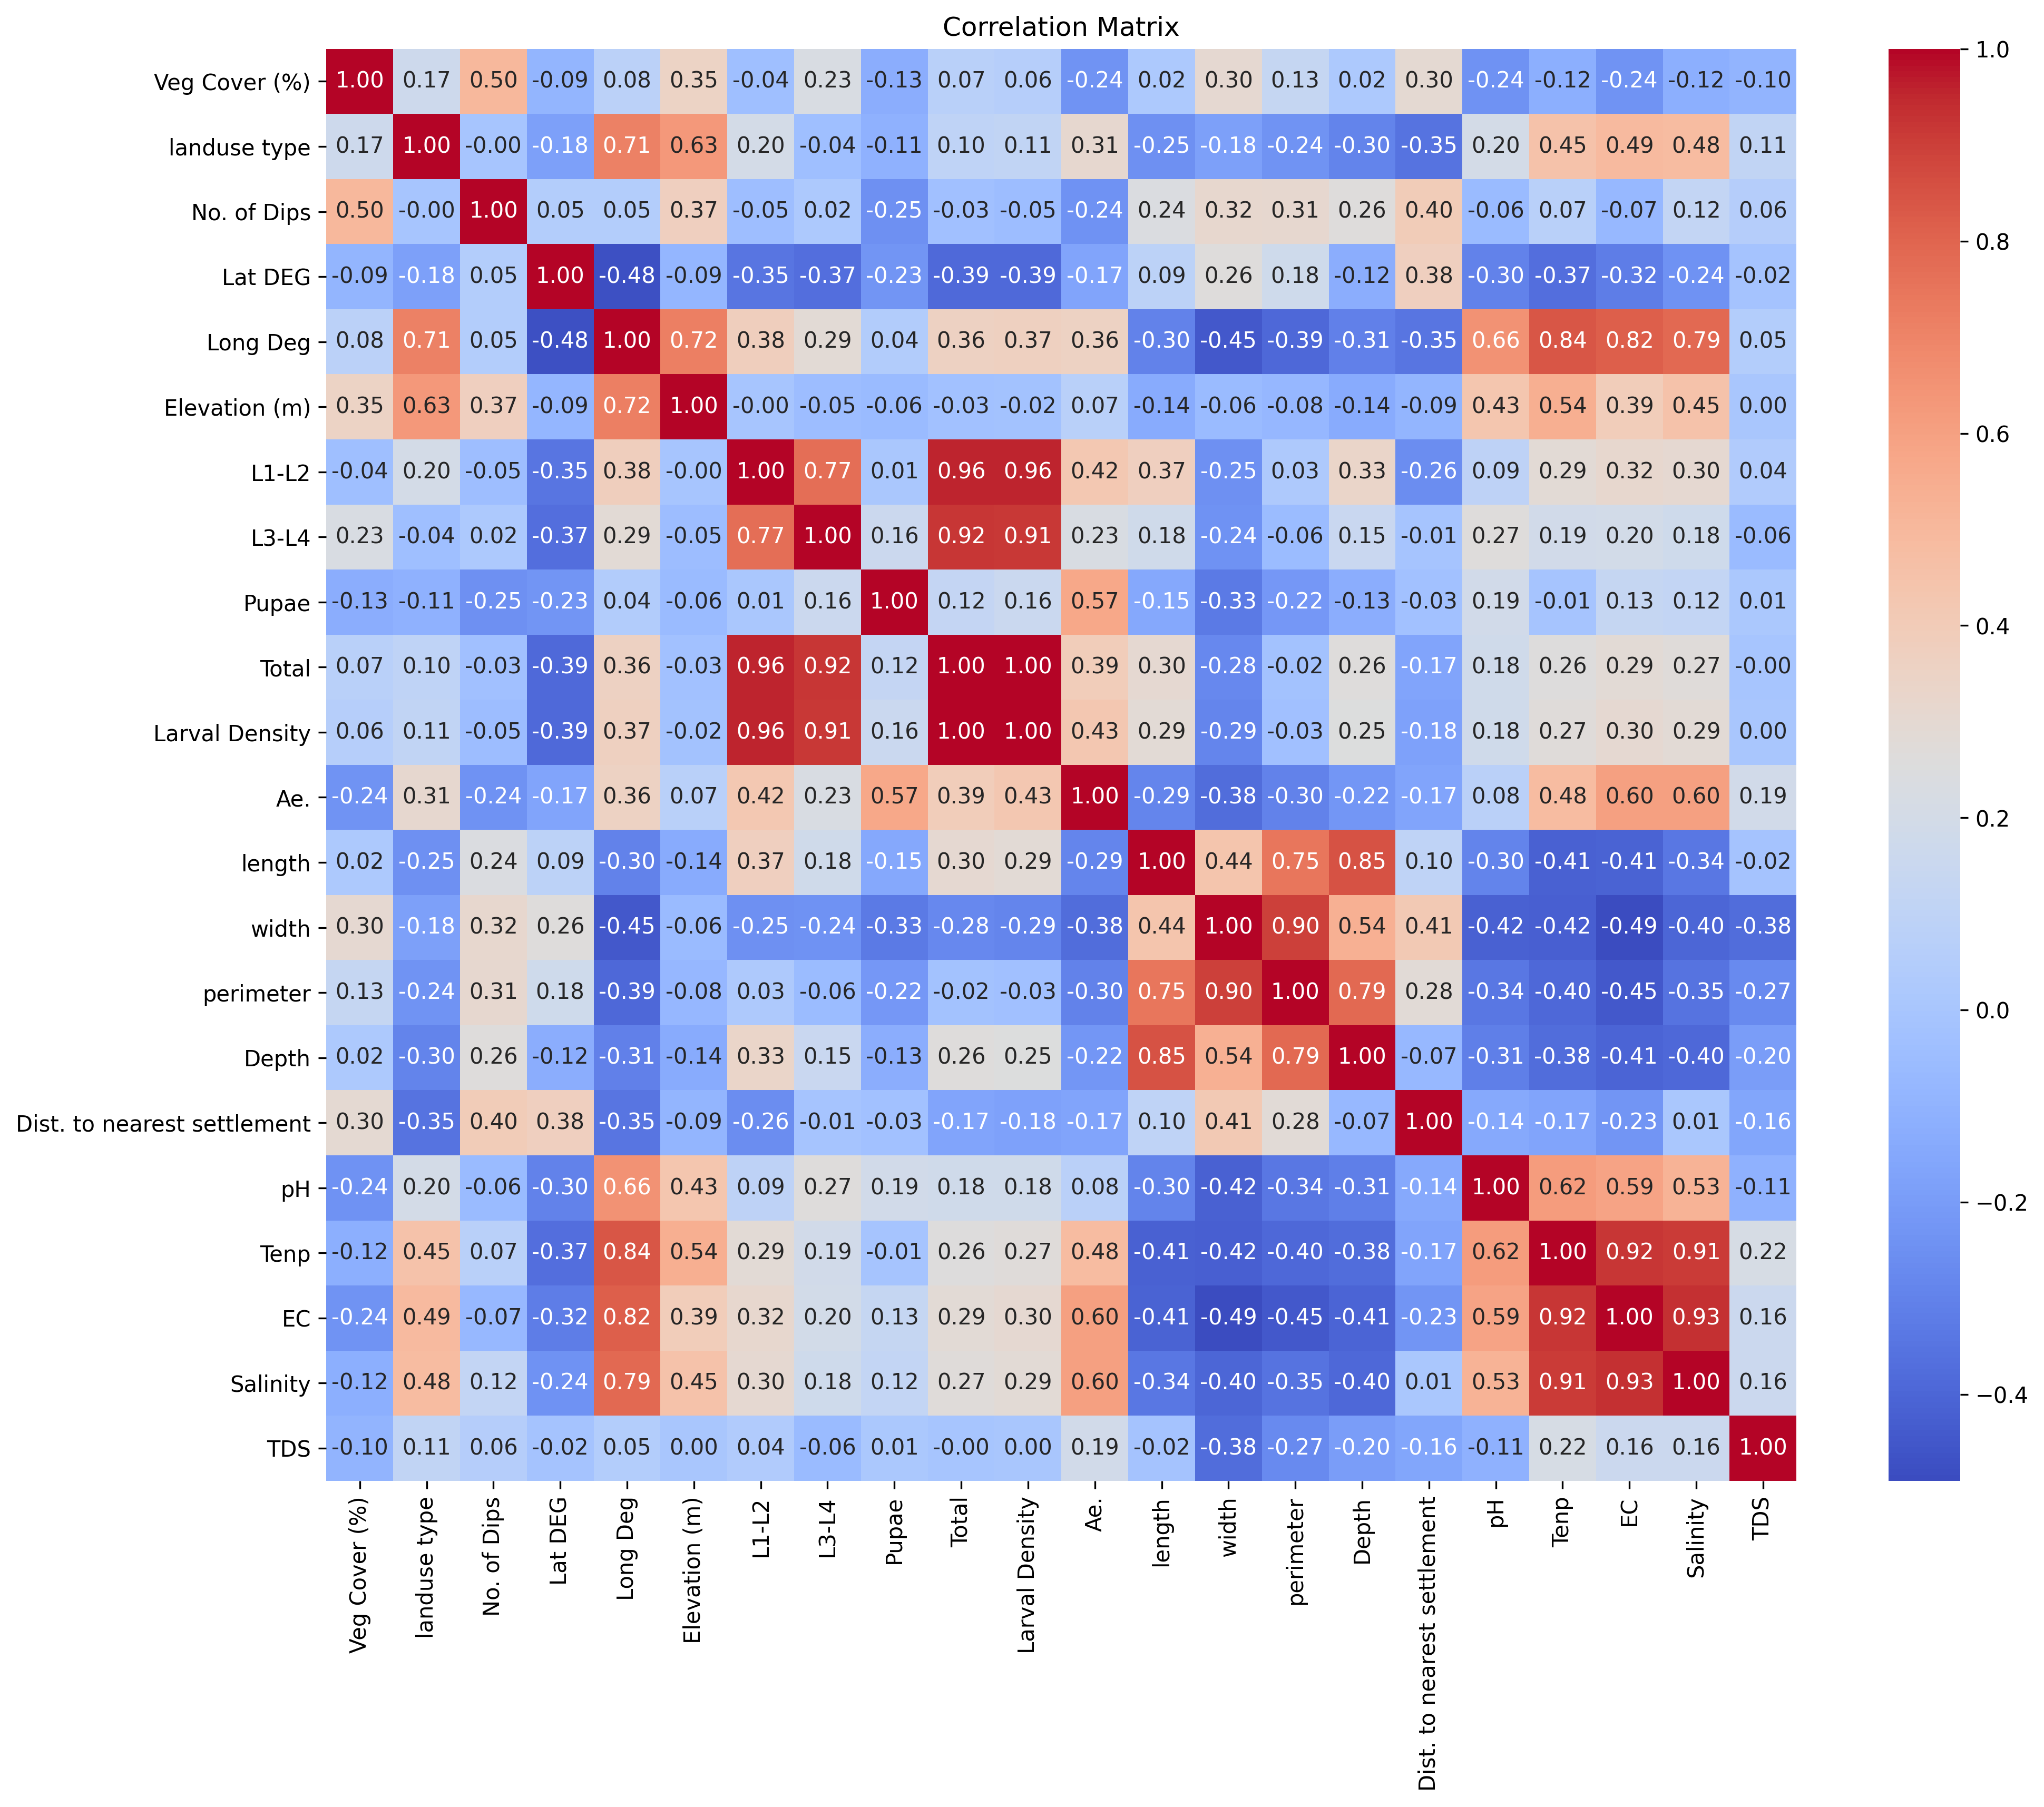

In [62]:
plt.figure(figsize=(15, 12), dpi=300)
correlation_matrix = df_.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* Pairplot for numerical columns

<Figure size 7500x6000 with 0 Axes>

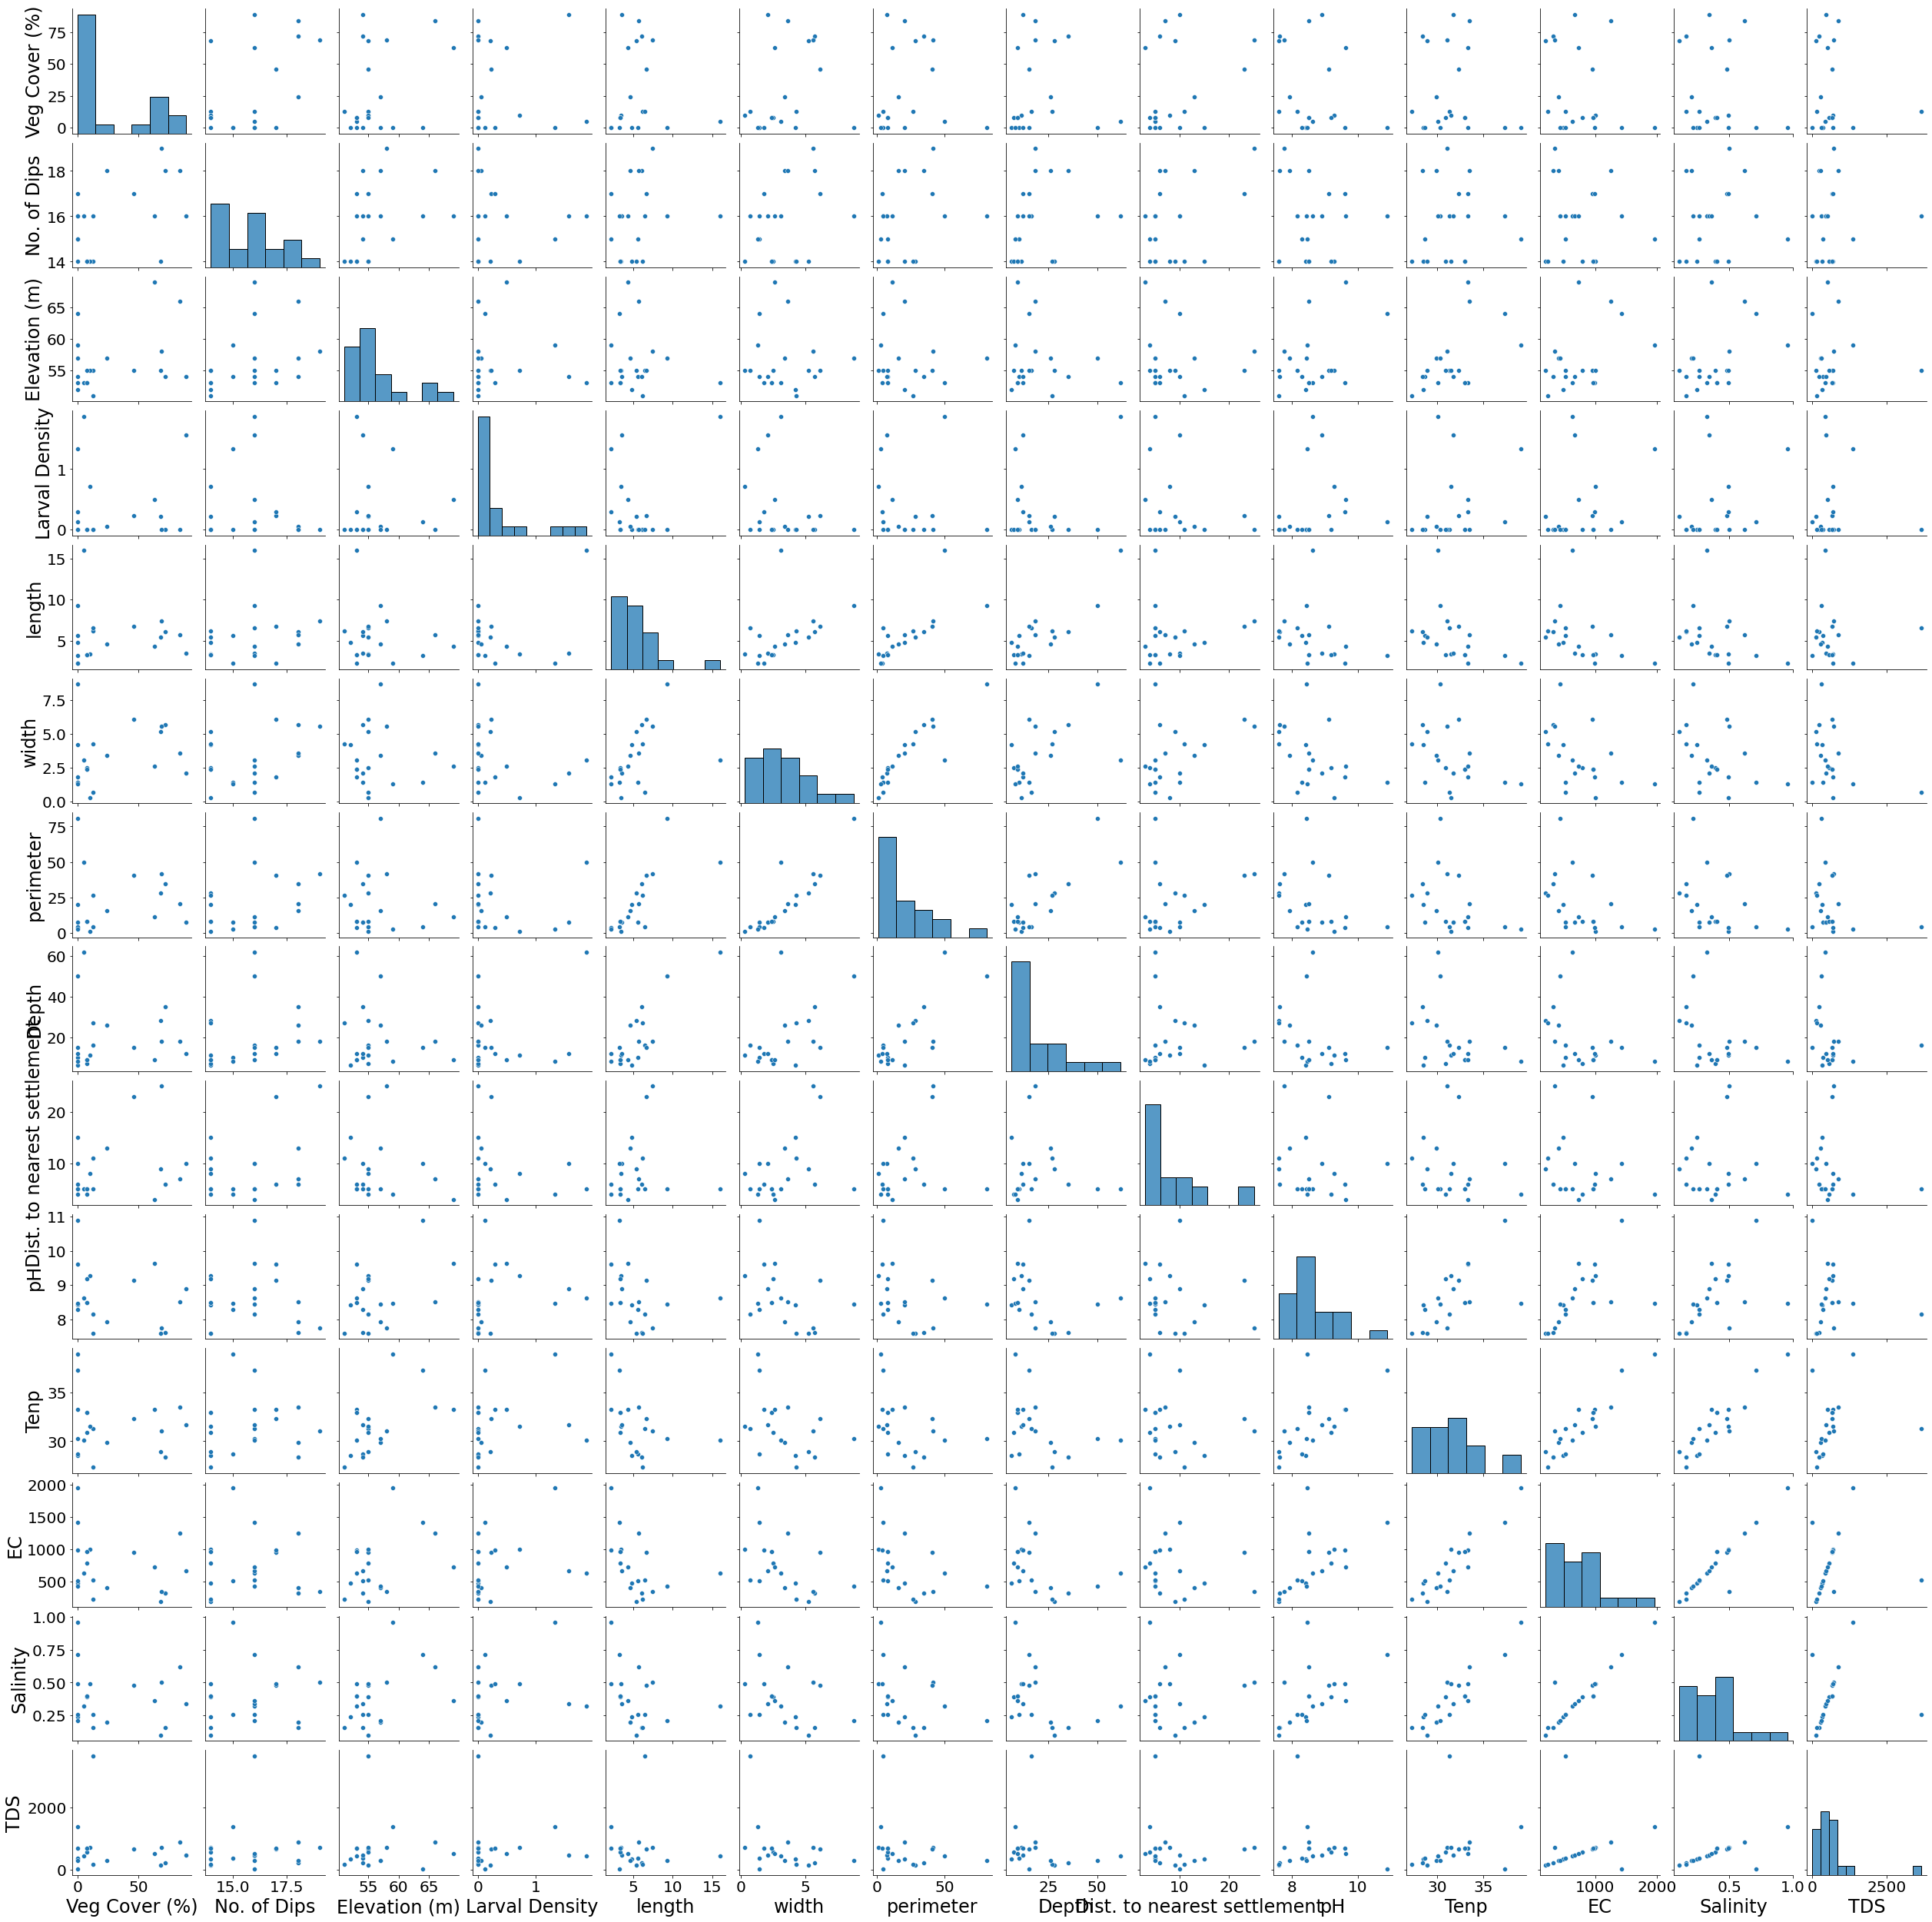

In [74]:
plt.figure(figsize=(25, 20), dpi=300)
pairplot=sns.pairplot(df_[['Veg Cover (%)', 'No. of Dips', 'Elevation (m)', 'Larval Density', 'length', 'width', 'perimeter', 'Depth', 'Dist. to nearest settlement', 'pH', 'Tenp', 'EC', 'Salinity', 'TDS']])
# Adjust axis labels font size
for ax in pairplot.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=24)
    ax.set_ylabel(ax.get_ylabel(), fontsize=24)
    ax.tick_params(axis='both', which='both', labelsize=20)
plt.show()

* Distribution of categorical columns

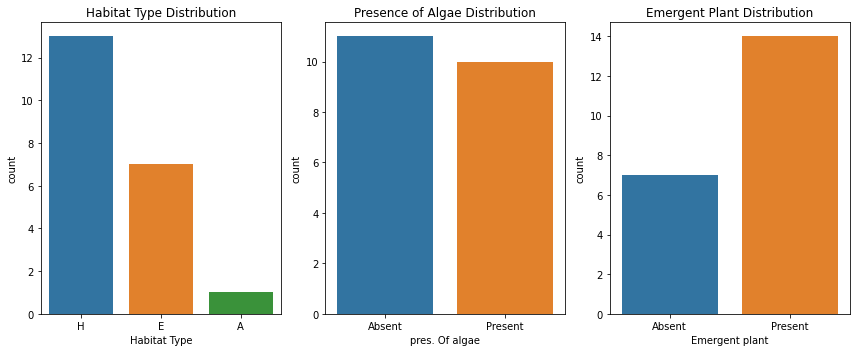

In [69]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Habitat Type', data=df_)
plt.title('Habitat Type Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='pres. Of algae', data=df_)
plt.title('Presence of Algae Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='Emergent plant', data=df_)
plt.title('Emergent Plant Distribution')

plt.tight_layout()
plt.show()


* Boxplots for key numerical variables

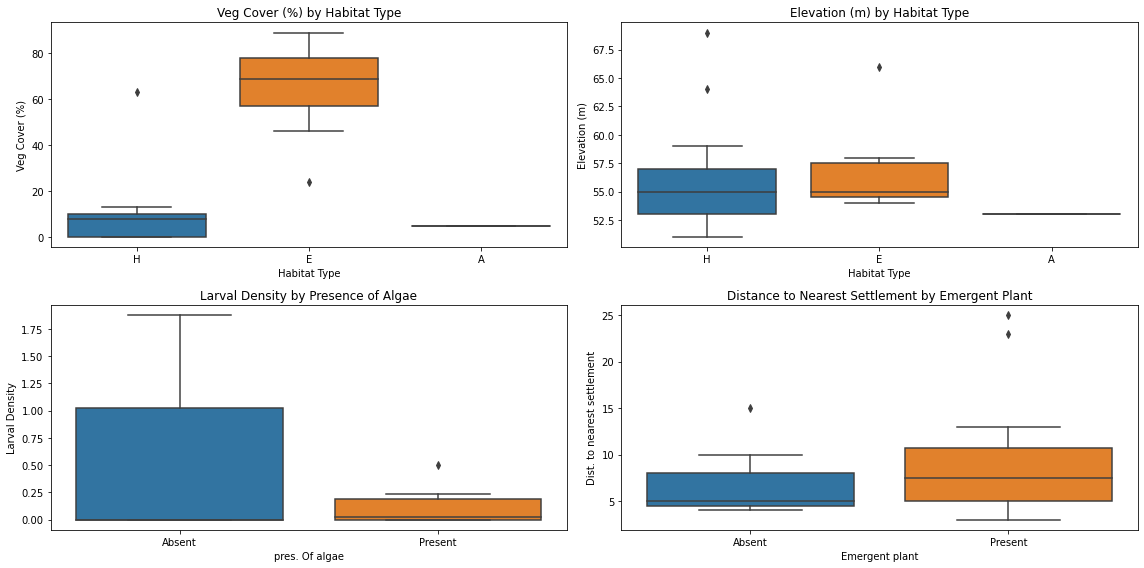

In [70]:

plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='Habitat Type', y='Veg Cover (%)', data=df_)
plt.title('Veg Cover (%) by Habitat Type')

plt.subplot(2, 2, 2)
sns.boxplot(x='Habitat Type', y='Elevation (m)', data=df_)
plt.title('Elevation (m) by Habitat Type')

plt.subplot(2, 2, 3)
sns.boxplot(x='pres. Of algae', y='Larval Density', data=df_)
plt.title('Larval Density by Presence of Algae')

plt.subplot(2, 2, 4)
sns.boxplot(x='Emergent plant', y='Dist. to nearest settlement', data=df_)
plt.title('Distance to Nearest Settlement by Emergent Plant')

plt.tight_layout()
plt.show()

In [76]:
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 233.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 430.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 326.0 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 391.6 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [78]:
!ls

COVID-19DATA_DZIFA_7_2_24.xlsx mdata.xlsx
DZIFAS_DATA.ipynb              ne_110m_admin_0_countries
Untitled.ipynb                 ne_110m_admin_0_countries.zip
Untitled1.ipynb                synthetic_data.csv
Untitled2.ipynb                synthetic_data_updated.csv
Untitled3.ipynb                untitled folder
WAMCAD_lecture01_.pdf          vis_mis_plot.png
WAMCAD_lecture02._.pdf


In [77]:
import geopandas as gpd

In [79]:
# Load the shapefile of Ghana
ghana_map = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

In [81]:
# Merge the Ghana map with the Malaria data
malaria_geo = gpd.GeoDataFrame(df_, geometry=gpd.points_from_xy(df_['Long Deg'],
                                                               df_['Lat DEG']))
malaria_geo = gpd.sjoin(malaria_geo, ghana_map, how='inner', op='within')


Text(57.875, 0.5, 'Latitude')

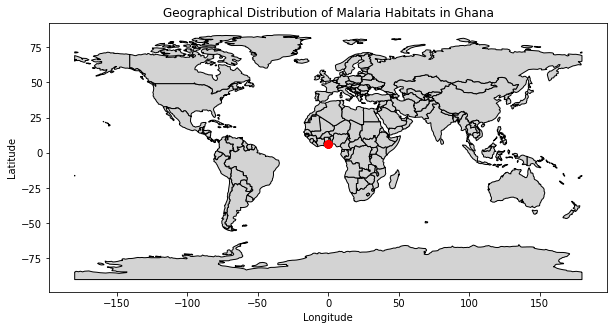

In [83]:
# Plotting the Ghana map
fig, ax = plt.subplots(figsize=(10, 10))
ghana_map.plot(ax=ax, color='lightgrey', edgecolor='black')
# Plotting the Malaria data points
malaria_geo.plot(ax=ax, color='red', marker='o', markersize=50, alpha=0.7, label='Malaria Habitats')

# Set plot title and labels
plt.title('Geographical Distribution of Malaria Habitats in Ghana')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

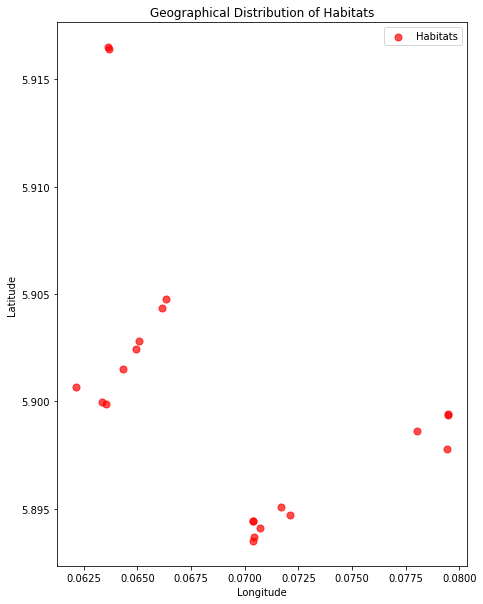

In [86]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df with 'Lat DEG' and 'Long Deg' columns

# Create a GeoDataFrame from the DataFrame
geometry = gpd.points_from_xy(df_['Long Deg'], df_['Lat DEG'])
geo_df = gpd.GeoDataFrame(df_, geometry=geometry)

# Plotting the geographical distribution
fig, ax = plt.subplots(figsize=(10, 10))
geo_df.plot(ax=ax, marker='o', color='red', markersize=50, alpha=0.7, label='Habitats')

# Set plot title and labels
plt.title('Geographical Distribution of Habitats')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show legend
plt.legend()

# Show the plot
plt.show()


In [87]:
import skgstat as skg

In [88]:
#
def interpolate(V, ax, xi, yi):
    
    xx, yy = np.meshgrid(xi, yi)
    ok = skg.OrdinaryKriging(V, 
                             min_points=5,
                             max_points=15,
                             mode='exact')
    field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
    art = ax.matshow(field, 
                     origin='lower', 
                     cmap='cubehelix', 
                     interpolation='lanczos')
    ax.set_title('%s model' % V.model.__name__)
    plt.colorbar(art, ax=ax)
    ax.grid(False)
    
    return field
#

def geo_stats(coords, xi, yi, df_vals, nlags=6, maxlag=0.2):
    
    for k, c in enumerate(list(df_vals.columns)):
        print('Generating spectral & spatial distribution of {} ..'.format(c))
        
        V = skg.Variogram(coords, df_vals['{}'.format(c)].values, 
                          normalize=False,
                          estimator='matheron',
                          model='matern',
                          dist_func='euclidean',
                          bin_func='uniform',
                          fit_method='trf',
                          fit_sigma=None,
                          use_nugget=False,
                          maxlag=None,
                         samples=None,
                         n_lags=30,)
        V.maxlag = maxlag
        V.n_lags = nlags
        xdata = V.bins
        ydata = V.experimental
        
        
        if k < 1: 
              k +=1
              
        fig, _a = plt.subplots(2,3, num=k + 1, figsize=(18, 10), sharex=True, sharey=True, dpi =120)
        axes = _a.flatten()
        for i, model in enumerate(('spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic')):
            V.model = model
            V.plot(axes=axes[i], hist=True, show=False)
            axes[i].set_title(r'$\rm Model: %s; \rho: %.2f; ; \sigma: %.3f$' % (model, V.r, V.rmse)) # rmse
            
            # <compute range, sill, nugget>
#             xdata = V.bins
#             print(V.bins)
#             ydata = V.experimental
#             print(V.experimental)
            p0 = [np.mean(xdata), np.mean(ydata), 0.01]
            cof, cov =curve_fit(V.model, xdata, ydata, p0=p0)
            print(model)
            print("range: %.2f sill: %.2f nugget: %.2f" % (cof[0], cof[1], cof[2]))

        fig.tight_layout()            


        fields = []
        
        fig, _a = plt.subplots(2,3, num=k + 2, figsize=(18, 12), sharex=True, sharey=True, dpi=120)
        axes = _a.flatten()
        
        for i, model in enumerate(('spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic')):
            
            V.model = model
            fields.append(interpolate(V, axes[i], xi=xi, yi=yi))
        fig.tight_layout()
        plt.show()

Generating spectral & spatial distribution of Veg Cover (%) ..
spherical
range: 0.01 sill: 932.34 nugget: 252.16
exponential
range: 0.03 sill: 1178.19 nugget: 6.34


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

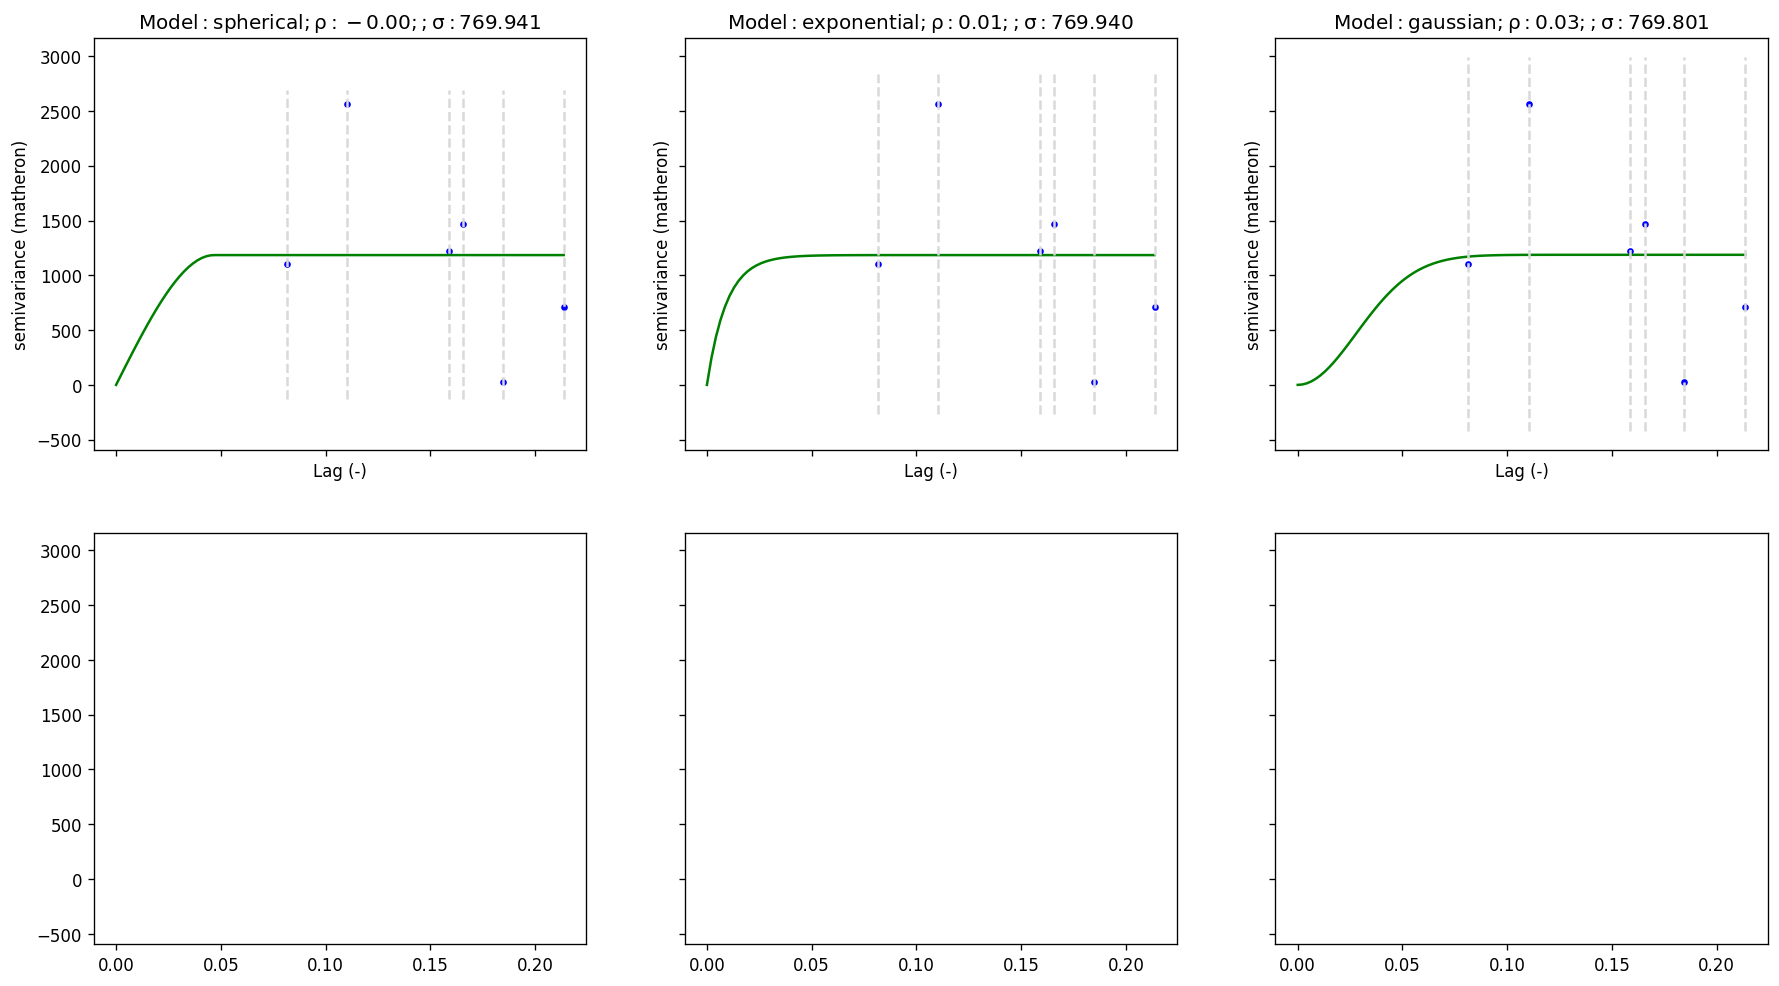

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skgstat as skg
from scipy.optimize import curve_fit

# Assuming you have the Malaria data as a DataFrame named 'malaria_df'
# If not, replace this with your actual DataFrame

# Set up example data for coordinates
np.random.seed(42)
malaria_df = df_.copy()
coords = np.random.rand(len(malaria_df), 2)

# Set up example data for values

df_vals = malaria_df[['Veg Cover (%)', 'No. of Dips', 'Elevation (m)', 'Larval Density', 'length', 'width', 'perimeter', 'Depth', 'Dist. to nearest settlement', 'pH', 'Tenp', 'EC', 'Salinity', 'TDS']]

# Function to interpolate and generate variograms
def interpolate(V, ax, xi, yi):
    xx, yy = np.meshgrid(xi, yi)
    ok = skg.OrdinaryKriging(V, 
                             min_points=5,
                             max_points=15,
                             mode='exact')
    field = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)
    art = ax.matshow(field, 
                     origin='lower', 
                     cmap='cubehelix', 
                     interpolation='lanczos')
    ax.set_title('%s model' % V.model.__name__)
    plt.colorbar(art, ax=ax)
    ax.grid(False)
    
    return field

def geo_stats(coords, xi, yi, df_vals, nlags=6, maxlag=0.2):
    for k, c in enumerate(df_vals.columns):
        print('Generating spectral & spatial distribution of {} ..'.format(c))
        
        V = skg.Variogram(coords, df_vals[c].values, 
                          normalize=False,
                          estimator='matheron',
                          model='matern',
                          dist_func='euclidean',
                          bin_func='uniform',
                          fit_method='trf',
                          fit_sigma=None,
                          use_nugget=False,
                          maxlag=None,
                          samples=None,
                          n_lags=30,)
        V.maxlag = maxlag
        V.n_lags = nlags
        xdata = V.bins
        ydata = V.experimental
        
        if k < 1: 
              k +=1
              
        fig, _a = plt.subplots(2, 3, num=k + 1, figsize=(18, 10), sharex=True, sharey=True, dpi=120)
        axes = _a.flatten()
        for i, model in enumerate(('spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic')):
            V.model = model
            V.plot(axes=axes[i], hist=True, show=False)
            axes[i].set_title(r'$\rm Model: %s; \rho: %.2f; ; \sigma: %.3f$' % (model, V.r, V.rmse)) # rmse
            
            # <compute range, sill, nugget>
            p0 = [np.mean(xdata), np.mean(ydata), 0.01]
            cof, cov = curve_fit(V.model, xdata, ydata, p0=p0)
            print(model)
            print("range: %.2f sill: %.2f nugget: %.2f" % (cof[0], cof[1], cof[2]))

        fig.tight_layout()            

        fields = []
        
        fig, _a = plt.subplots(2, 3, num=k + 2, figsize=(18, 12), sharex=True, sharey=True, dpi=120)
        axes = _a.flatten()
        
        for i, model in enumerate(('spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic')):
            V.model = model
            fields.append(interpolate(V, axes[i], xi=xi, yi=yi))
        fig.tight_layout()
        plt.show()

# Example usage
xi = np.linspace(min(malaria_df['Long Deg']), max(malaria_df['Long Deg']), 100)
yi = np.linspace(min(malaria_df['Lat DEG']), max(malaria_df['Lat DEG']), 100)

geo_stats(coords, xi, yi, df_vals)
